# Проект "Анализ рынка видеоигр"

## Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на **потенциально популярный продукт и спланировать рекламные кампании**. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

## Задачи для исследования: 

- Составьте портрет пользователя каждого региона. 

Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Проверьте гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Содержание: <a id = "start"></a>

#### Открытие данных
- [Изучение данных](#open)


#### Предобработка данных 

- [Замена пропусков](#inplace)
- [Замена типа данных](#type)
- [Добавление столбца с выручкой](#summ)
- [Вывод](#step2)


#### Исследовательский анализ

- [Количество выпущенных игр в зависимости от года](#hist)
- [Суммарные продажи по платформе в зависимости от года](#profit) 
- [Распределение по годам для ТОП-5 платформ](#top5)
- [Распределение  платформ в актуальный период в СA](#sa)
- [Распределение  платформ в актуальный период в Европе](#eu)
- [Распределение  платформ в актуальный период в Японии](#jp)
- [Распределение  платформ в актуальный период в других регионах](#drugie)
- [Распределение  платформ в актуальный период в мире](#world)
- [Вывод](#step3)
- [Построение боксплотов по выбранным платформам](#box)
- [Вывод](#box2)
- [Исследование выбранной платформы](#PS3)
- [Вывод](#ps3)
- [Исследование зависимости продаж от жанра.](#genre)
- [Вывод](#genre1)
- [Портрет пользователя для каждого региона](#port)
- [Вывод1](#port1)
- [Вывод2](#port2)
- [Вывод3](#port3)

#### Статистический анализ данных

- [Гипотеза 1](#hip1)
- [Гипотеза 2](#hip2)

#### Общий вывод 
- [Вывод](#finish)

### Откроем и изучим данные <a id = "open"></a>

In [2]:
#загружаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math 

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv') #путь Яндекса
except:
    df = pd.read_csv('D:\Яндекс Практикум\Project_4\games.csv') #локальный путь

In [4]:
display(df.sample(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2575,Capcom's Soccer Shootout,SNES,1993.0,Sports,0.00,0.00,0.80,0.00,NaN,NaN,NaN
3322,Tony Hawk's Underground,GBA,2003.0,Sports,0.43,0.16,0.00,0.01,86.0,7.7,E
15961,Majesty 2: The Fantasy Kingdom Sim,PC,2009.0,Simulation,0.01,0.00,0.00,0.00,72.0,7.3,T
13084,DokiDoki Majo Shinpan!,DS,2007.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
9659,High Velocity: Mountain Racing Challenge,SAT,1995.0,Racing,0.00,0.00,0.12,0.00,NaN,NaN,NaN


In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Видно, что названия столбцов написаны в разном регистре, приведем их  к одному, **нижнему**, регистру.

Проверим уникальные значения в разных столбцах.

In [6]:
for col in df.columns:
    print('Уникальные значения столбца {}'.format(col))
    print(df[col].unique())
    print('--------------------------------------')
        


Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
--------------------------------------
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
--------------------------------------
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
--------------------------------------
Уни

Интересно значение **tbd** в столбце с отзывами пользователей. Это означает, что игра анонсирована. Соответственно, рейтинга еще нет и быть не может. Заменим на пустое значение.

Проверим данные на **пропуски**.

In [7]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


- Пропуски в столбцах **name, Year_of_Release,Genre** составляют менее 5 %, поэтому удалим их. 

- Отсутствующие значения в столбцах **Critic_Score, User_Score** очень субьективны. Нужно посмотреть от чего они могут зависеть. Это можно сделать после исследования типов данных.
- в столбце **Rating** очень много пропусков. Мы можем найти игру на других платформах и поставить то же значение вместо пропуска. Если и этих данных не будет, тогда пропуск заменим на пустое значение.

Рассмотрим типы данных.

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Необходимо поменять тип данных в столбцах: 
- **Year_of_Release, Critic_Score,User_Score** на *int*;
- **NA_sales, EU_sales, JP_sales, Other_sales** домножить на 1000 и округлить с избытком, а потом перевести данные в *int*.

Проверим на дубликаты.

In [9]:
df.duplicated().sum()

0

[в начало](#start)

### Предобработка данных <a id = "inplace"></a>

Приведем названия столбцов к нижнему регистру.

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Удалим пропуски в столбцах **name, year_of_release, genre** , т.к. их меньше 5%.

In [11]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)

In [12]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.450000
user_score,40.170000


Домножим нужные столбцы на 1000 и, округлив значение, переведем тип в **int**. А другие столбцы просто переведем в **int**.

Напишем цикл для перевода типа. <a id = "type"></a>

In [13]:
columns_100 = ['na_sales','eu_sales','jp_sales','other_sales'] #отдельно соберем столбцы, которые нужно домножать и округлять
for col in df.columns:
    if col in columns_100:
        df[col] = (df[col]*1000).apply(math.ceil).astype('int')
print(df.dtypes) #выведем типы данных

name                object
platform            object
year_of_release    float64
genre               object
na_sales             int32
eu_sales             int32
jp_sales             int32
other_sales          int32
critic_score       float64
user_score          object
rating              object
dtype: object


Отдельно поменяем тип на **int** в столбце **year_of_release**, т.к. здесь не нужно округлять и домножать.

In [14]:
df['year_of_release'] = df['year_of_release'].astype('int')

Пока в столбцах есть пропуски, мы не сможем поменять тип данных. Поэтому заменим оставшиеся пропуски на пустое значение.

In [15]:
def fillna_df(df):
    columns = ['critic_score', 'user_score']
    for col in df.columns:
        if col  in columns:
            df[col] = df[col].fillna(0)
    return df



In [16]:
fillna_df(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,0.0,0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,0.0,0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0,10,0,0,0.0,0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,0.0,0,NaN
16713,Spirits & Spells,GBA,2003,Platform,10,0,0,0,0.0,0,NaN


In [17]:
df['rating'] = df['rating'].fillna(value='No rating')

Проверим на пропуски

In [18]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Заменим значения  **tbd** на пустое значение в столбце с пользовательским рейтингом.

In [19]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-1'

In [20]:
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Сменим тип данных в столбцах с рейтингом. Применим **to_numeric**.

In [21]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors= 'coerce')

In [22]:
df['user_score'] = pd.to_numeric(df['user_score'], errors= 'coerce')

Проверим замену типа в датасете.

In [23]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales             int32
eu_sales             int32
jp_sales             int32
other_sales          int32
critic_score       float64
user_score         float64
rating              object
dtype: object

Применим для датасета **кореляцию Пирсона**, чтобы выделить взаимосвязи и,возможно, внести коррективы в замену пропусков.

In [24]:
df.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092327,0.004045,-0.168477,0.037821,0.113979,0.131585
na_sales,-0.092327,1.000000,0.766546,0.451162,0.638479,0.153383,0.140546
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.170641,0.154270
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,-0.042975,-0.021333
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.176062,0.165186
critic_score,0.113979,0.153383,0.170641,-0.042975,0.176062,1.000000,0.795121
user_score,0.131585,0.140546,0.154270,-0.021333,0.165186,0.795121,1.000000


Кореляция показывает, что данные по отзывам практически не коррелируют ни с какаими другими данными, кроме друг друга.

[в начало](#start)

Посчитаем **суммарный доход по всем регионам** для каждой игры и для каждой платформы. И добавим этот столбец в данные. <a id = "summ"></a>

In [25]:
df['profit']=df['na_sales']+ df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
13335,Soul Eater: Plot of Medusa,DS,2008,Action,0,0,50,0,0.0,0.0,No rating,50
15026,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014,Action,0,0,20,0,0.0,0.0,No rating,20
10853,Robots,XB,2005,Action,70,20,0,0,60.0,-1.0,E,90
5352,UEFA Euro 2008 Austria-Switzerland,X360,2008,Sports,80,230,0,30,0.0,0.0,No rating,340
1500,Rugrats Studio Tour,PS,1999,Adventure,570,670,0,70,0.0,0.0,No rating,1310


Посмотрим с какими данными коррелирует общий доход от игры.

In [26]:
df.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,profit
year_of_release,1.000000,-0.092327,0.004045,-0.168477,0.037821,0.113979,0.131585,-0.076220
na_sales,-0.092327,1.000000,0.766546,0.451162,0.638479,0.153383,0.140546,0.941241
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.170641,0.154270,0.901673
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,-0.042975,-0.021333,0.613305
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.176062,0.165186,0.748930
critic_score,0.113979,0.153383,0.170641,-0.042975,0.176062,1.000000,0.795121,0.148656
user_score,0.131585,0.140546,0.154270,-0.021333,0.165186,0.795121,1.000000,0.139603
profit,-0.076220,0.941241,0.901673,0.613305,0.748930,0.148656,0.139603,1.000000


#### Вывод <a id = "step2"></a>

- Больше всего общий доход коррелирует с продажами в США и Европе. Скорее всего нужно считать что рынок в США самый перспективный,т.к.  коэффициент практически приближен к 1.
- Мы убрали пропуски, изменили тип данных, добавили столбец с суммарным доходом. Можем перейти к исследовательскому анализу данных.


[в начало](#start)

### Исследовательский анализ данных <a id = "hist"></a>

**Посмотрим сколько игр было продано в зависимости от года.**

In [27]:
games_of_yaer = (df
                .pivot_table(index = 'year_of_release',
                             values = 'name',
                             aggfunc = 'count'))
games_of_yaer.columns = ['count']
games_of_yaer.head()
                 

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


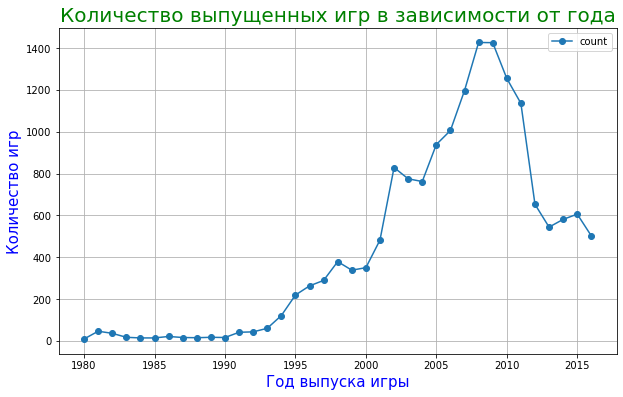

In [28]:
(games_of_yaer
 .plot( grid = True, style = 'o-', figsize=(10,6)))

plt.title('Количество выпущенных игр в зависимости от года',fontsize=20, color='green')
plt.xlabel('Год выпуска игры',fontsize=15, color='blue') 
plt.ylabel('Количество игр',fontsize=15, color='blue')
plt.show()

На графике видно, что пик количества выпущенных игр пришелся на период с 2005 по 2011 год. Далее наступил спад,и количество игр держится около отметки ~600. Думаю логично для анализа взять как раз **период с 2012 года до 2016**. 


[в начало](#start)

**Исследуем суммарные продажи в зависимости от платформы** <a id = "profit"></a>

In [29]:
df['profit'] = (df['profit']).astype('int')

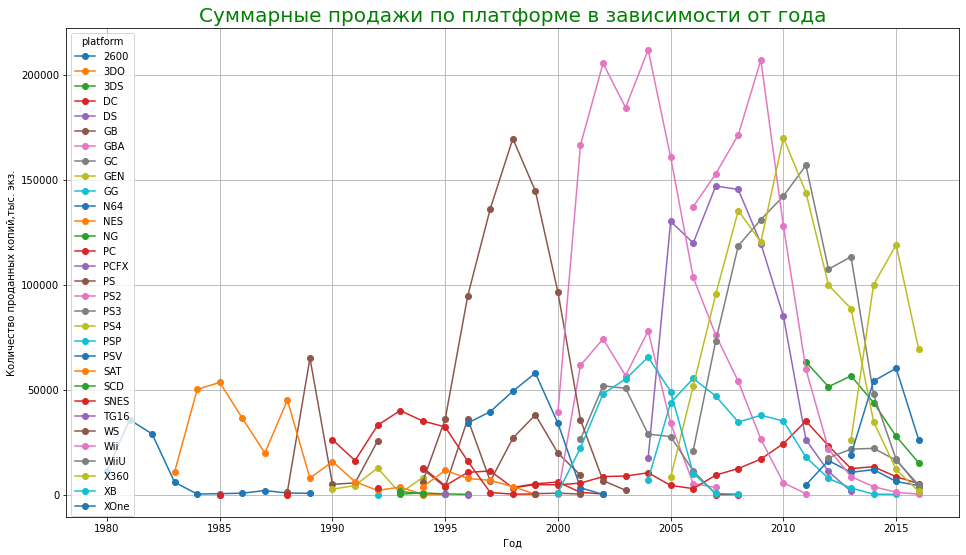

In [30]:
(df.pivot_table(index = 'year_of_release',
                                columns = 'platform',
                                values = 'profit',
                                aggfunc = 'sum')
                   .plot(grid = True,
                         style = '-o',
                         figsize=(16,9)))
plt.title('Суммарные продажи по платформе в зависимости от года', fontsize = 20, color = 'g')
plt.xlabel('Год') 
plt.ylabel('Количество проданных копий,тыс. экз.')
plt.show()

Отсюда видно , что средний срок "жизни" платформы ~10 лет. Из предыдущего графика видно, что после 2011 года продажи упали и не достигают прежнего уровня. Думаю **актуальность данных** можно ограничить **2012 и 2016 годом**.


На графиках видно, что какие-то платформы перестали существовать уже в 2000х. Но поскольку возможности цвета ограничены, убедимся в наших выводах построив таблицу. Определим 5ку лидеров по продажам. Возьмем данные начиная с 2012 года (как уже определили выше)  и посмотрим у кого продажи были больше всех. <a id = "top5"></a>

In [31]:
top_5 = (df
         .query('year_of_release >= 2012')
         .pivot_table(index = 'platform',
                      values = 'profit',
                      aggfunc = 'sum')
         .sort_values(by = 'profit', ascending = False))
top_5.head()


,profit
platform,
PS4,314140
PS3,288790
X360,236540
3DS,194610
XOne,159320


Построим распеделение по годам для ТОП-5 платформ.

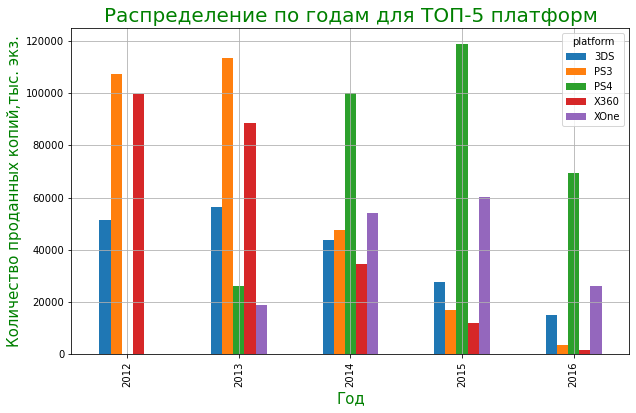

In [32]:
top = (df
       .query('year_of_release >= 2012')
       .query('platform in ("PS3","X360","PS4", "3DS", "XOne")')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'profit',
                    aggfunc = 'sum')
       .plot(kind = 'bar',
             grid = True,
            figsize = (10,6)))
plt.title('Распределение по годам для ТОП-5 платформ', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

Из данных видно ,что насмотря на высокие продажи **X360, PS3 и 3DS** заканчивают свое существование, продажи их падают. Но им на смену приходят дугие платформы.


[в начало](#start)

Рассмотрим более внимательно продажи в **актуальный период**. Ограничим годы, посмотрим на продажи в целом по каждой платформе,чтобы выбрать наиболее перспективные. Сначала посмотрим данные по регионам, потом глобальные продажи.  <a id = "sa"></a>

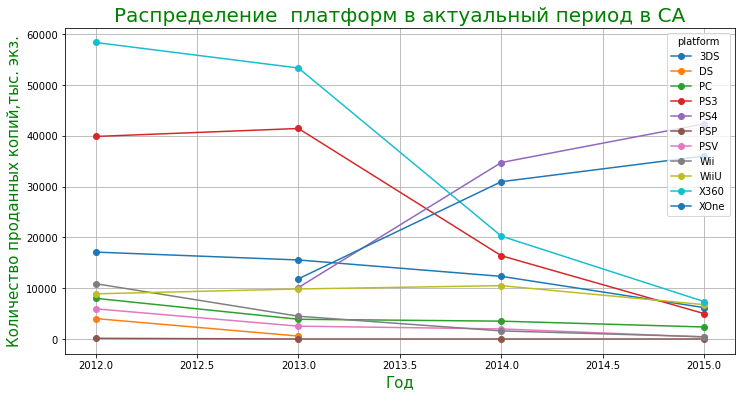

In [33]:
perspektive_NA = (df
       .query('year_of_release >= 2012 and year_of_release <= 2015')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'na_sales',
                    aggfunc = 'sum')
       .plot(style = 'o-',
             grid = True,
            figsize = (12,6)))
plt.title('Распределение  платформ в актуальный период в СA', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

<a id = "eu"></a>

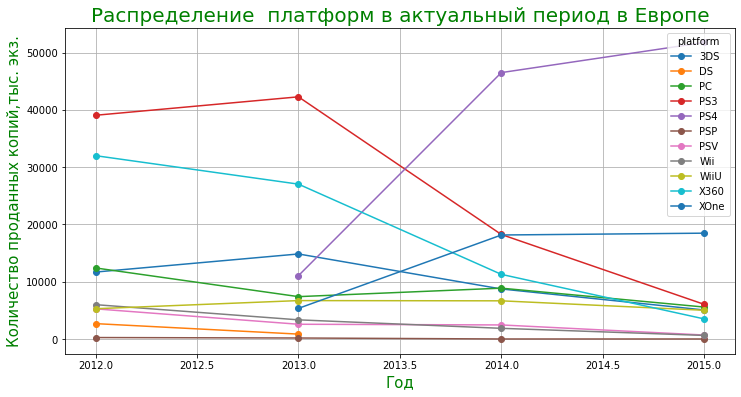

In [34]:
perspektive_EU = (df
       .query('year_of_release >= 2012 and year_of_release <= 2015')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'eu_sales',
                    aggfunc = 'sum')
       .plot(style = 'o-',
             grid = True,
            figsize = (12,6)))
plt.title('Распределение  платформ в актуальный период в Европе', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

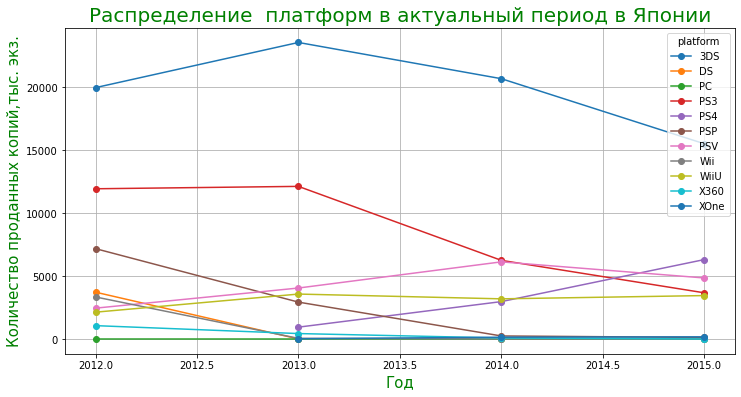

In [35]:
perspektive_Jp = (df
       .query('year_of_release >= 2012 and year_of_release <= 2015')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'jp_sales',
                    aggfunc = 'sum')
       .plot(style = 'o-',
             grid = True,
            figsize = (12,6)))
plt.title('Распределение  платформ в актуальный период в Японии', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

<a id = "drugie"></a>

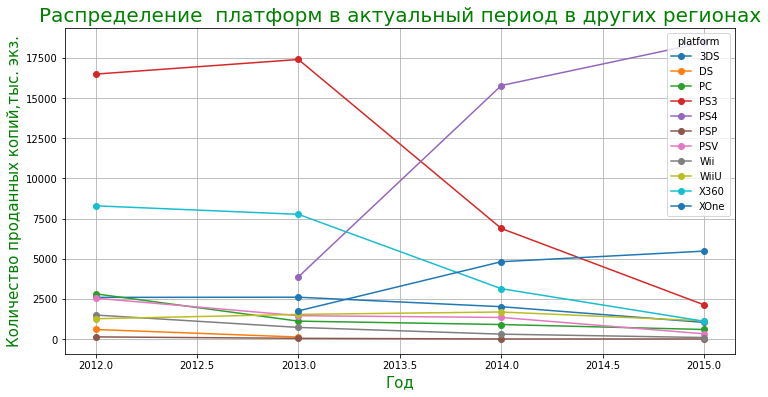

In [36]:
perspektive = (df
       .query('year_of_release >= 2012 and year_of_release <= 2015')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'other_sales',
                    aggfunc = 'sum')
       .plot(style = 'o-',
             grid = True,
            figsize = (12,6)))
plt.title('Распределение  платформ в актуальный период в других регионах', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

<a id = "world"></a>

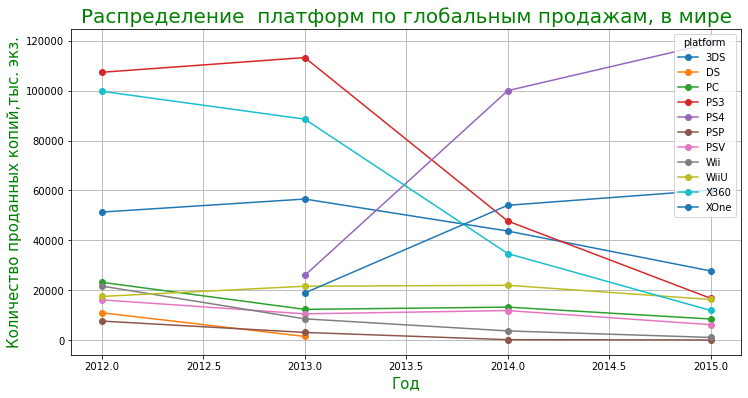

In [37]:
perspektive_world = (df
       .query('year_of_release >= 2012 and year_of_release <= 2015')
       .pivot_table(index = 'year_of_release',
                    columns = 'platform',
                    values = 'profit',
                    aggfunc = 'sum')
       .plot(style = 'o-',
             grid = True,
            figsize = (12,6)))
plt.title('Распределение  платформ по глобальным продажам, в мире', fontsize = 20, color = 'g')
plt.xlabel('Год',fontsize = 15, color = 'g') 
plt.ylabel('Количество проданных копий,тыс. экз.',fontsize = 15, color = 'g')
plt.show()

- В то время, когда **PS3** заканчивает свое существование и падают продажи, появляется **PS4**. И в данный момент вполне актуальна. Судя по данным 15 года она на пике популярности(данные за 2016 год неполны).
- Аналогично, с платформами Xbox: **X360** заканчивает свою карьеру, но на смену ему пришел **XOne**. И тоже показывает хорошие результаты по росту. 
- У всех остальных консолей наблюдается спад. Несмотря на это стоит присмотреться к :
    * платформе **WiiU**(пришедшей на смену Wii)  
    * **PC**, т.к. она показывает стабильный результат на протяжении всего времени.
Портативные **PSP** и **PSV** стабильно стремятся к нулевым продажам, поэтому их актуальность под сомнением. 


### Вывод <a id = "step3"></a>

- В данный момент стоит обратить внимание на **PS4**. Она на пике популярности во всем мире, даже в Японии.
- В США, практически на одном уровне с ней, лидирует **XOne**. В остальных регионах она продается не так хорошо.
- На **PC**  и **WiiU** стоит обратить внимание. Они не дают пиков, скорее стабильный результат.

[в начало](#start)

Построим боксплоты для глобальных продаж по платформам.
Создадим копию датафрейма с актуальным промежутком для исследования

In [38]:
df_copy = df.query('year_of_release >= 2012 and year_of_release <= 2015')

Напишем таблицу для построения боксплотов по выбранным платформам. Удалим выбросы.

Построим боксплоты.

In [39]:
df_box = (df_copy
               .loc[(df_copy['profit'] >= df_copy['profit'].quantile(.05))&(
                   df_copy['profit'] <= df_copy['profit'].quantile(.95))]
               .query('platform in ("PC","PS3","PS4","X360","XOne","Wii", "WiiU")')
               .pivot_table(index =['platform', 'name'], values = 'profit', aggfunc = 'median')
               .fillna(0))
df_box = df_box.reset_index()
df_box.columns = ['platform', 'name', 'profit']
df_box.head()

,platform,name,profit
0,PC,4 Play Collection - Dark Mysteries,10
1,PC,7 Roses: A Darkness Rises,20
2,PC,Act of Aggression,10
3,PC,Alan Wake,70
4,PC,Alien: Isolation,150


<AxesSubplot:xlabel='profit', ylabel='platform'>

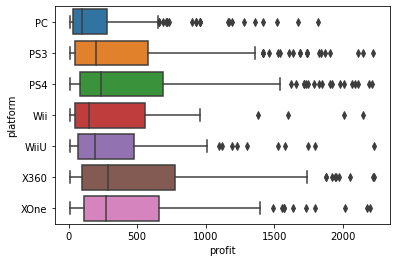

In [40]:
sns.boxplot(x = 'profit', y = 'platform', data = df_box)

Визуализация позволяет предположить, что среди выбранных платформ можно выбрать лидеров по продажам.Так видно, что медианные значения для **PC** находятся на уровне японских **Wii** и **WiiU**. 
У платформ **PS3** и**PS4** очень много выбросов, это означает, что помимо медианных значений у них есть очень популярные игры с количесвом более 14 млн. проданных копий. 
Посмотрим на медианы и средние этих платформ.

In [41]:
#напишем функцию, которая позволяет увидеть медиану, среднее и диапазон значний по каждой платформе
def dispers(df,value):
    platform = ['PC','PS3','PS4','X360','XOne','Wii', 'WiiU', '3DS']
    for row in platform:
        data = df.query('platform == @row')
        median = data[value].median()
        mean = data[value].mean()
        var = np.var(data[value], ddof=1)
        st = np.std(data[value],ddof = 1)
        b = mean+3*st
        print('Данные по платформе',row)
        print('Медиана {:.2f}'.format(median))
        print('Среднее значение {:.2f}'.format(mean))
        #print('Дисперсия  {:.2f}'.format(var))
        #print('Стандартное отклонение  {:.2f}'.format(st))
        print('Значения находятся в промежутке от 0 до ', b )
        print('-------------------------------------------')

In [42]:
dispers(df_copy,'profit')

Данные по платформе PC
Медиана 100.00
Среднее значение 292.86
Значения находятся в промежутке от 0 до  1933.539927553805
-------------------------------------------
Данные по платформе PS3
Медиана 230.00
Среднее значение 626.79
Значения находятся в промежутке от 0 до  5172.566571547496
-------------------------------------------
Данные по платформе PS4
Медиана 310.00
Среднее значение 1074.08
Значения находятся в промежутке от 0 до  6773.443530241194
-------------------------------------------
Данные по платформе X360
Медиана 340.00
Среднее значение 842.37
Значения находятся в промежутке от 0 до  6076.6311354417485
-------------------------------------------
Данные по платформе XOne
Медиана 350.00
Среднее значение 832.31
Значения находятся в промежутке от 0 до  4379.041349328685
-------------------------------------------
Данные по платформе Wii
Медиана 180.00
Среднее значение 663.96
Значения находятся в промежутке от 0 до  4188.121769296364
-------------------------------------------
Д

### Вывод <a id = "box2"></a>

Мы видим что внутри одного производителя ситуация очень похожа: PS4 сменяет PS3, XOne сменяет X360, а WiiU сменяет Wii. 
Если посмотреть на средние и медианные значения, то становится понятно, как на них повлияли выбросы. 
Платформа **PS3**:
- несмотря на то, что боксплот показал их очень плотными выбросами, скорее это закономерные продажи на отметке до 5млн копий.
- при этом медиана в два раза меньше среднего, явно есть игры с высокими продажами.
Платформа **PS4**:
- Еще больше разброс между медианой и средним, более чем в 3 раза. 
- Видно чоень много выбросов, платформа только набирает обороты.
Платформы **XOne** и **X360** показывают очень похожий результат. Самая высокая медиана.
Японские **WiiU и  Wii** нужно рассматривать думаю отдельно в регионе. По всему миру они показывают не лучший результат. Но думаю, что в конкретном регионе цифры будут другими.


[в начало](#start)

#### Исследование популярной платформы <a id = "PS3"></a>

Возьмем самую популярную платформу **PS3** и помотрим влияют ли отзывы критиков и пользователей на продажи.

Прежде чем оценивать связь отзывов и продаж уберем нулевые значения, которыми мы заменили пропуски.

<AxesSubplot:xlabel='critic_score', ylabel='profit'>

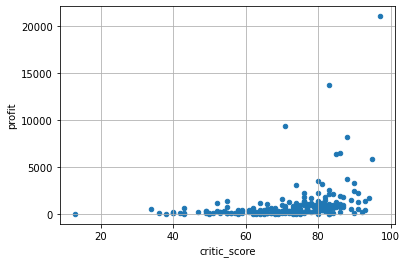

In [43]:
df_ps3 = (df_copy
         .query('platform == "PS3"')
         .query('critic_score!=0 and user_score!=0'))
df_ps3.plot(kind = 'scatter',
       x = 'critic_score',
       y = 'profit',
       grid = True)

Отсюда видно, что оценка критиков выше 70,дает высокие продажи. 

<AxesSubplot:xlabel='user_score', ylabel='profit'>

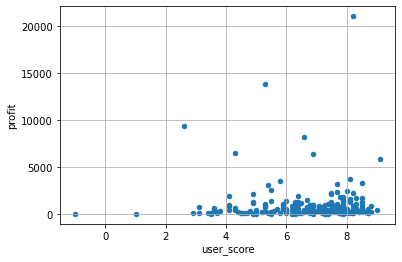

In [44]:
df_ps3.plot(kind = 'scatter',
        x = 'user_score',
        y = 'profit',
        grid = True)

В то же время даже низкий пользовательский рейтинг показывает высокие продажи. Здесь стоит смотреть на игры с рейтингом от 6.

In [45]:
df_ps3.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,profit
year_of_release,1.000000,-0.091879,-0.074008,-0.089176,-0.077724,-0.167851,-0.107817,-0.087736
na_sales,-0.091879,1.000000,0.854286,0.416544,0.892564,0.340216,-0.004347,0.941662
eu_sales,-0.074008,0.854286,1.000000,0.440676,0.989671,0.305943,-0.000449,0.975179
jp_sales,-0.089176,0.416544,0.440676,1.000000,0.441337,0.173506,0.156646,0.508901
other_sales,-0.077724,0.892564,0.989671,0.441337,1.000000,0.312856,0.016756,0.986174
critic_score,-0.167851,0.340216,0.305943,0.173506,0.312856,1.000000,0.558547,0.331497
user_score,-0.107817,-0.004347,-0.000449,0.156646,0.016756,0.558547,1.000000,0.013750
profit,-0.087736,0.941662,0.975179,0.508901,0.986174,0.331497,0.013750,1.000000


Корреляция Пирсона показывает, что продажи по этой платформе больше зависят от оценки критиков, нежели от оценки пользователя.
Т.е. стоит обратить внимание на игры с рейтингом критиков от 70, в то время когда пользовательский рейтинг не настолько важен. Но лучше если он будет больше 6.

Посмотрим на диаграмму рассеяния общей информации, без учета PS3. Оценим кореляцию.

<AxesSubplot:xlabel='critic_score', ylabel='profit'>

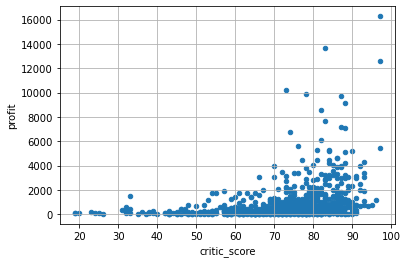

In [46]:
df_no_ps3 = (df_copy
         .query('platform != "PS3"')
         .query('critic_score!=0 and user_score!=0'))
df_no_ps3.plot(kind = 'scatter',
        x = 'critic_score',
        y = 'profit',
        grid = True)

<AxesSubplot:xlabel='user_score', ylabel='profit'>

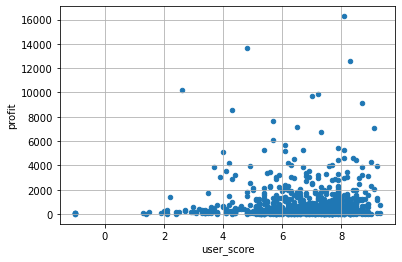

In [47]:
df_no_ps3.plot(kind = 'scatter',
        x = 'user_score',
        y = 'profit',
        grid = True)

Аналогично обстоят дела на диаграммах рассеяния по всем платформам за выбранный актуальный период.

### Вывод <a id = "ps3"></a>

Отсюда делаем вывод,повторяющий предыдущий:
- для успешности игры необходимы отзывы критиков выше 70, а вот пользовательские рейтинги видимо очень субьективны. И показывают высокие продажи для игр с рейтингом от 2 до 5.


[в начало](#start)

#### Исследование зависимости продаж от жанра. <a id = "genre"></a>

Теперь посмотрим на зависимость продаж от жанра. Сгруппируем данные и построим столбчаую диаграмму.

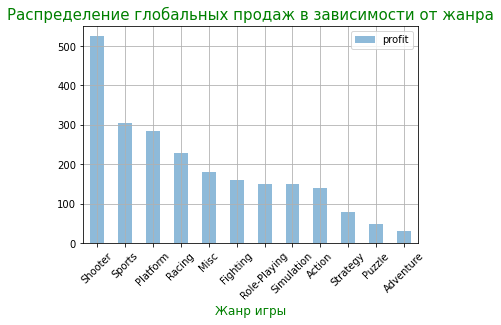

In [48]:
df_genre = (df_copy
            .pivot_table(index = 'genre', values = 'profit', aggfunc = 'median')
            .sort_values(by = 'profit', ascending = False)
            .plot(kind = 'bar',
                alpha = 0.5,
                grid = True))
plt.title('Распределение глобальных продаж в зависимости от жанра', fontsize = 15, color = 'g')
plt.xlabel('Жанр игры',fontsize = 12, color = 'g' )
plt.xticks(rotation= 45)
plt.show()

### Вывод <a id = "genre1"></a>

Из диаграммы видно, что максимальные продажи у жанров **Shooter** и **Sports**.  Очень выделяются минимальные продажи у жанров **Adventure**  и **Puzzle**,так что на них даже при хороших рейтингах не стоит ставить.

[в начало](#start)

### Портрет пользователя для каждого региона. <a id = "port"></a>

Создадим для каждого региона табличку с долей продаж по жанру игры. 

In [49]:
df_na = df_copy[['genre','na_sales']]
df_na = df_na.pivot_table(index = 'genre', values = 'na_sales', aggfunc = ['sum'])
df_na.columns = ['na_sale']
df_na['na_sale'] = df_na['na_sale']/(df_na['na_sale'].sum())*100
df_na.sort_values(by = 'na_sale', ascending = False).head(5)

,na_sale
genre,
Action,30.867702
Shooter,23.538569
Sports,13.550289
Role-Playing,10.642078
Misc,6.854809


In [50]:
df_eu = df_copy[['genre','eu_sales']]
df_eu = df_eu.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = ['sum'])
df_eu.columns = ['eu_sales']
df_eu['eu_sales'] = df_eu['eu_sales']/(df_eu['eu_sales'].sum())*100
df_eu.sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
genre,
Action,32.629500
Shooter,21.415716
Sports,12.528534
Role-Playing,9.712467
Misc,5.632133


In [51]:
df_jp = df_copy[['genre','jp_sales']]
df_jp = df_jp.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = ['sum'])
df_jp.columns = ['jp_sales']
df_jp['jp_sales'] = df_jp['jp_sales']/(df_jp['jp_sales'].sum())*100
df_jp.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
genre,
Role-Playing,33.952790
Action,26.392336
Misc,6.821723
Simulation,5.817510
Fighting,5.015294


- Из таблиц видно что в Европе и Америке ТОП-5 жанров не отличается. И доля продаж идентична.  
- В Японии ситуация совершенно другая: в ТОП-5 попадают другие жанры, и распределение продаж меняется. Есть 2 явных лидера, которые забирают 60% рынка.

Построим столбчатую диаграмму и оценим данные визуально. Для этого склеим талбички в одну.

In [52]:
df_genre = df_na.merge(df_eu,on = ['genre'], how = 'outer')
df_genre = df_genre.merge(df_jp,on = ['genre'], how = 'outer' )
df_genre

,na_sale,eu_sales,jp_sales
genre,,,
Action,30.867702,32.629500,26.392336
Adventure,1.459600,1.786655,4.074566
Fighting,3.287305,2.074188,5.015294
Misc,6.854809,5.632133,6.821723
Platform,4.411765,4.394205,4.917181
Puzzle,0.206945,0.305092,1.235067
Racing,3.019925,5.601405,1.437064
Role-Playing,10.642078,9.712467,33.952790
Shooter,23.538569,21.415716,4.715184


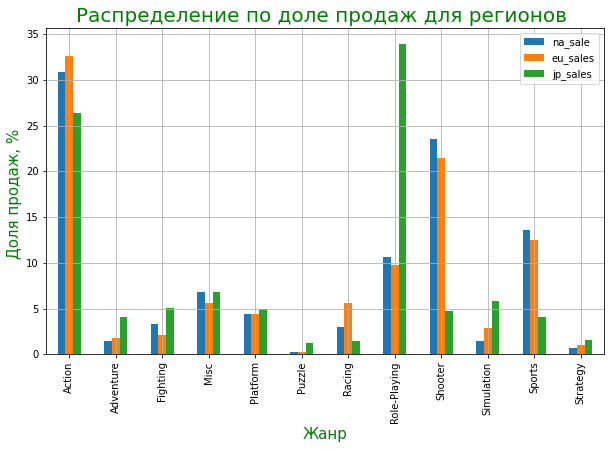

In [53]:
df_genre.plot(kind = 'bar',
              grid = True,
              figsize = (10,6))
plt.title('Распределение по доле продаж для регионов ', fontsize = 20, color = 'g')
plt.xlabel('Жанр',fontsize = 15, color = 'g') 
plt.ylabel('Доля продаж, % ',fontsize = 15, color = 'g')
plt.show()

### Вывод <a id = "port1"></a>

Здесь очень хорошо видно что жанр **Action** входит в ТОП-5 по всем трем регионам с хорошими показателями. А вот **Shooter** интересен только в Европе и Америке. В Японии же на пике популярности **Role-Playing**. Хотя в предыдущем исследовании этого было не видно. 
- Т.е. для Европы и США ТОП-5 платформ выглядит не так, как для Японии. 
- Рынок США и Европы очень похож по жанрам игр, несмотря на разницу в предпочтениях по платформам. 

Итак **ТОП-5 жанров для Европы и Америки**:
    -  Action
    -  Shooter
    -  Sports
    -  Role-Playing
    -  Misc 
    
Для **Японии ТОП-5 жанров** выглядит так:
    - Role-Playing
    - Action
    - Misc
    - Simulation
    - Fighting

[в начало](#start)

#### Аналогично рассмотрим платформы

In [54]:
df_na = df_copy[['platform','na_sales']]
df_na = df_na.pivot_table(index = 'platform', values = 'na_sales', aggfunc = ['sum'])
df_na.columns = ['na_sales']
df_na['na_sales'] = df_na['na_sales']/(df_na['na_sales'].sum())*100
df_na.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
platform,
X360,25.521940
PS3,18.809977
PS4,15.978683
XOne,14.440334
3DS,9.371108


In [55]:
df_eu = df_copy[['platform','eu_sales']]
df_eu = df_eu.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = ['sum'])
df_eu.columns = ['eu_sales']
df_eu['eu_sales'] = df_eu['eu_sales']/(df_eu['eu_sales'].sum())*100
df_eu.sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
platform,
PS4,23.992537
PS3,23.178227
X360,16.200615
XOne,9.209833
3DS,8.847673


In [56]:
df_jp = df_copy[['platform','jp_sales']]
df_jp = df_jp.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = ['sum'])
df_jp.columns = ['jp_sales']
df_jp['jp_sales'] = df_jp['jp_sales']/(df_jp['jp_sales'].sum())*100
df_jp.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
platform,
3DS,46.032204
PS3,19.616783
PSV,10.088301
WiiU,7.121833
PSP,6.042592


In [57]:
df_pl = df_na.merge(df_eu,on = ['platform'], how = 'outer')
df_pl = df_pl.merge(df_jp,on = ['platform'], how = 'outer' )
df_pl

,na_sales,eu_sales,jp_sales
platform,,,
3DS,9.371108,8.847673,46.032204
DS,0.840598,0.774802,2.146938
PC,3.252509,7.513169,0.000000
PS3,18.809977,23.178227,19.616783
PS4,15.978683,23.992537,5.898309
PSP,0.023808,0.092186,6.042592
PSV,1.983371,2.407814,10.088301
Wii,3.184748,2.592186,1.956484
WiiU,6.592924,5.190957,7.121833


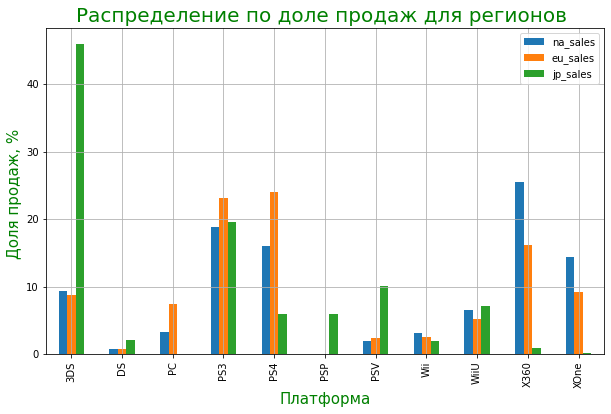

In [58]:
df_pl.plot(kind = 'bar',
              grid = True,
              figsize = (10,6))
plt.title('Распределение по доле продаж для регионов ', fontsize = 20, color = 'g')
plt.xlabel('Платформа',fontsize = 15, color = 'g') 
plt.ylabel('Доля продаж, % ',fontsize = 15, color = 'g')
plt.show()

### Вывод <a id = "port2"></a>

-  платформам ситуация в регионах также разнится. Например, в США лидирует **X360**, но мы понимаем, что срок жизни ее подходит к концу, на мену ей пришла **XOne**. И в США она тоже в лидерах

- В Европе же лидируют **PS3** и **PS4**. За ними идут обе платформы **Xbox**. 

- А в Японии лидирует **3DS**, причем с колоссальным отрывом. Все остальные платформы в Японии делят оставшуюся от нее половину рынка.

Итак:
    ТОП-5 платформ для региона "США":
        - X360
        - PS3
        - PS4
        - XOne
        - 3DS
    ТОП-5 платформ для региона "Европа":
        - PS4
        - PS3
        - X360
        - XOne
        - 3DS
    ТОП-5 платформдля региона "Япония":
        - 3DS
        - PS3
        - PSV
        - WiiU
        - PSP
Различия определенно видны. 

[в начало](#start)

#### Рассмотрим зависимость продаж от рейтинга  ESRB.

In [59]:
df_na = df_copy[['rating','na_sales']]
df_na = df_na.pivot_table(index = 'rating', values = 'na_sales', aggfunc = ['sum'])
df_na.columns = ['na_sales']
df_na['na_sales'] = df_na['na_sales']/(df_na['na_sales'].sum())*100
df_na.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
rating,
M,39.539228
E,19.485752
No rating,17.357703
E10+,13.165702
T,10.451615


In [60]:
df_eu = df_copy[['rating','eu_sales']]
df_eu = df_eu.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = ['sum'])
df_eu.columns = ['eu_sales']
df_eu['eu_sales'] = df_eu['eu_sales']/(df_eu['eu_sales'].sum())*100
df_eu.sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
rating,
M,38.942054
E,21.821773
No rating,18.443810
E10+,11.316945
T,9.475417


In [61]:
df_jp = df_copy[['rating','jp_sales']]
df_jp = df_jp.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = ['sum'])
df_jp.columns = ['jp_sales']
df_jp['jp_sales'] = df_jp['jp_sales']/(df_jp['jp_sales'].sum())*100
df_jp.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
rating,
No rating,54.550701
E,15.732672
T,13.706931
M,11.542679
E10+,4.467017


In [62]:
df_esbr = df_na.merge(df_eu,on = ['rating'], how = 'outer')
df_esbr = df_esbr.merge(df_jp,on = ['rating'], how = 'outer' )
df_esbr

,na_sales,eu_sales,jp_sales
rating,,,
E,19.485752,21.821773,15.732672
E10+,13.165702,11.316945,4.467017
M,39.539228,38.942054,11.542679
No rating,17.357703,18.443810,54.550701
T,10.451615,9.475417,13.706931


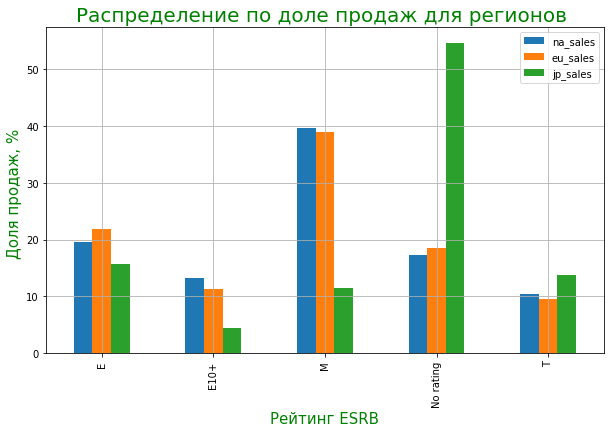

In [63]:
df_esbr.plot(kind = 'bar',
              grid = True,
              figsize = (10,6))
plt.title('Распределение по доле продаж для регионов ', fontsize = 20, color = 'g')
plt.xlabel('Рейтинг ESRB',fontsize = 15, color = 'g') 
plt.ylabel('Доля продаж, % ',fontsize = 15, color = 'g')
plt.show()

### Вывод <a id = "port3"></a>

Поскольку маркировка **ESRB** присутствует только в **Канаде и США** (т.е. регион NA), то и показатели интересны по большей части в Северной Америке. А там зависимость видна. 
Больше всего продаются игры для **взрослых( с пометкой М)**, а вот тинейджерские и детские (т.е. от 10 до 18) занимают всего 20% рынка вместе. 
Но не на всех играх есть эта маркировка. Например, в **Японии** видно, что пик по продажам (более 50%) приходится на немаркированные игры. Это логично, в Японии свои система маркировки, как и в Европе. 
Но тем не менее, игры с маркировкой ESRB показывают **такую же долю продаж в Европе, как и в США. 
А в Японии эта маркировка не играет существенной роли**.


[в начало](#start)

## Статистический анализ

#### Сформулируем и проверим гипотезы.

#### Гипотеза 1. <a id = "hip1"></a>

H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC  различаются.

Сгруппируем данные по нужным платформам, создадим датасет.

In [64]:
X_rating = (df_copy
            .query('platform == "XOne"')
            .query('profit != 0'))
PC_rating = (df_copy
             .query('platform == "PC"')
             .query('profit != 0'))
            

Построим графики и гистаграммы, чтобы убедиться, что данные распределены нормально. Для этого напишем функцию.

In [65]:
def my_bins(df,value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return 100
    elif df[value].max() > 1000:
        return 200
    else: return 20
    
def two_hist(df1, df2,col):
    F_1 = df1[col]
    F_2 = df2[col]
    plt.figure(figsize = (6, 4))
    hist_1 = F_1.plot( 
        kind='hist',
        label = 'XOne',
        bins=my_bins(df1,col), 
        alpha=0.5, 
        ec='black', 
        color='green')
    hist_2 = F_2.plot( 
        kind='hist',
        label='PC',
        bins=my_bins(df2,col), 
        alpha=0.5, 
        ec='black', 
        color='red')

    plt.axvline(x=F_1.median(), linewidth=3, color='red', linestyle='--') 
    plt.axvline(x=F_2.median(), linewidth=3, color='blue', linestyle='--') 

    plt.title('Распределение по столбцу  ' +col) 
    plt.xlabel('Значение',fontsize=12) 
    plt.ylabel('Частота',fontsize=12)
    plt.legend()
    plt.grid() 
    plt.show()
    
    plt.figure(figsize =(6, 4))
    F_1.plot(kind='kde', 
            alpha=0.5,
            label = 'XOne',
            color='green')
    F_2.plot(kind='kde', 
            alpha=0.5,
            label='PC',
            color='red')
    plt.xlim(df1[col].quantile(.01), df1[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()
    
    print('--------------------------------------------------------------')

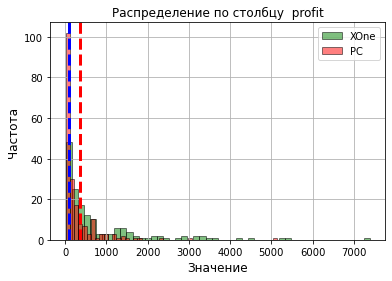

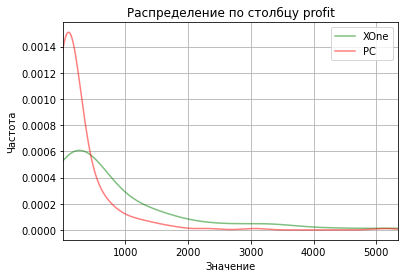

--------------------------------------------------------------


In [66]:
two_hist(X_rating, PC_rating,'profit')

Видно, что данные распределены **не нормально.** 

Проверим нормальность распределения в столбце **profit** для наших данных с помощью **метода Шапиро-Уилка**.

H0- данные в столбце **profit** распределены нормально. 
 
 H1- данные в столбце **profit** распределены  не нормально.

In [67]:
alpha = 0.05

statistic, pvalue = st.shapiro(X_rating['profit'])

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0127132210320496e-17
Отвергаем нулевую гипотезу


In [68]:
alpha = 0.05

statistic, pvalue = st.shapiro(PC_rating['profit'])

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.916524473603298e-23
Отвергаем нулевую гипотезу


Мы получили ненормально распределенные данные. Поэтому для этого столбца применим **критерий Манна-Уитни**


In [69]:
results = st.mannwhitneyu(
     X_rating['profit'], 
    PC_rating['profit'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2190213841419516e-12
Отвергаем нулевую гипотезу


#### Вывод

***Средние пользовательские рейтинги платформ Xbox One и PC имеют статистически значимые различия.***

#### Гипотеза 2. <a id = "hip2"></a>

H0- Средние пользовательские рейтинги жанров Action  и Sports равны.

H1- Средние пользовательские рейтинги жанров Action  и Sports различны.

Сгруппируем данные по нужным платформам, создадим датасет.


In [70]:
action = (df_copy
         .query('genre =="Action"')
         .query('user_score != ""'))
sports = (df_copy
         .query('genre =="Sports"')
         .query('user_score != ""'))

Проверим визуально распределены ли данные нормально. Используем написанную ранее функцию

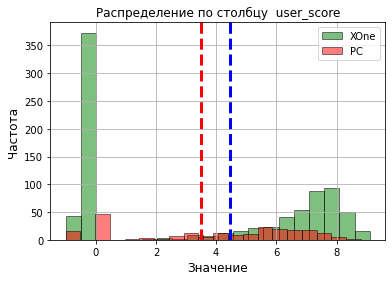

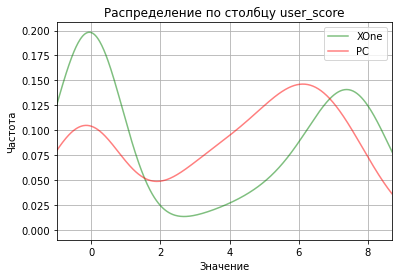

--------------------------------------------------------------


In [71]:
two_hist(action, sports,'user_score')

Убедимся, что данные распределены не нормально с помощью **метода Шапиро-Уилка.**

H0- данные в столбце **user_score** распределены нормально.

H1- данные в столбце **user_score** распределены не нормально.

In [72]:
alpha = 0.05

statistic, pvalue = st.shapiro(action['user_score'])

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1913693523039736e-32
Отвергаем нулевую гипотезу


In [73]:
alpha = 0.05

statistic, pvalue = st.shapiro(sports['user_score'])

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.246997379828919e-11
Отвергаем нулевую гипотезу


Поскольку **методом Шапиро-Уилка** не подтвердилось наше предположение, проверим нашу гипотезу для *нормально* распределенных данных и для *ненормально*.

Применим **критерий Манна-Уитни.**

In [74]:
results = st.mannwhitneyu(
     action['user_score'], 
    sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46245807121718735
Не получилось отвергнуть нулевую гипотезу


Проверим равенство дисперсий **критерием Левена**

H0 - дисперсии выборок равны

H1 - дисперсии выборок не равны

In [75]:
alpha = 0.05

results = st.levene(action['user_score'], 
                    sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.571808228297075e-29
Отвергаем нулевую гипотезу


In [76]:
def var_pr(df1, df2):
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return 'Дисперсии не равны'
    else:
        return 'Дисперсии равны'
    
var_pr(action['user_score'],sports['user_score'])

'Дисперсии не равны'

Поскольку методом Шапиро-Уилка не удалось опровергнуть ненормальность данных, а два теста показали что дисперсии неравны, применять критерий Стьюдента нелогично. Но попробуем.

Применим **критерий Стьюдента**

In [77]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10964095825593727
Не получилось отвергнуть нулевую гипотезу


Для критерия Стьюдента необходимы нормально распределенные данные. Визуально мы убедились , что данные распределены ненормально, это же показали тесты на равенство дисперсий. 


### Вывод

***Средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.***


## Общий вывод: <a id = "finish"></a>

Если выбирать самую перспективную платформу из данных в исследовании, то стоит обратить внимание на несколько факторов:
- **регион продаж**;
 

     Например, в США лидирует X360, но мы понимаем, что срок жизни ее подходит к концу, на мену ей пришла XOne. И в США она тоже в лидерах. 
 
    В Европе же лидируют PS3 и PS4. За ними идут обе платформы Xbox.
    А в Японии лидирует 3DS, причем с колоссальным отрывом. Все остальные платформы в Японии делят оставшуюся от нее половину рынка.
Итак: ТОП-5 платформ для региона "США":

    - X360
    - PS3
    - PS4
    - XOne
    - 3DS
ТОП-5 платформ для региона "Европа":
    - PS4
    - PS3
    - X360
    - XOne
    - 3DS
ТОП-5 платформдля региона "Япония":
    - 3DS
    - PS3
    - PSV
    - WiiU
    - PSP

   **жанр игры**

Здесь очень хорошо видно что жанр Action входит в ТОП-5 по всем трем регионам с хорошими показателями. А вот Shooter интересен только в Европе и Америке. В Японии же на пике популярности Role-Playing. 

Т.е. для Европы и США ТОП-5 платформ выглядит не так, как для Японии.
Рынок США и Европы очень похож по жанрам игр, несмотря на разницу в предпочтениях по платформам.
Итак ТОП-5 жанров для Европы и Америки:

-  Action
-  Shooter
-  Sports
-  Role-Playing
-  Misc 

Для Японии ТОП-5 жанров выглядит так:

- Role-Playing
- Action
- Misc
- Simulation
- Fighting

**рейтинг критиков** 
Здесь все просто, лучшие продажи показывают игры, с рейтингом от 70 и выше.

**возрастной маркер**
К сожалению, у нас не было данных по маркировке европейской и японской. Но маркировка СА показала, что лучше продаются игры для взрослых, чем для детей и тинейджеров.

Исходя их вышеперечисленного, и, учитывая статистический анализ, можно сделать вывод:
-из выбранных нами , как перспективные  платформ 'PC','PS3','PS4','X360','XOne','Wii', 'WiiU', '3DS', действительно **перспективными оказываются в мире 'PS3','PS4','XOne' и  все предыдущие + WiiU для Японии.**
3DS, которая показывала лучший результат в Японии и входила в 5ку в мире уже заканчивает свое существование. 